<a href="https://colab.research.google.com/github/omkarbhosale1623/My-Projects/blob/main/SentimentalAnalysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import re #Regular expressions
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [6]:
df = pd.read_csv('Tweets.csv')
print(df.shape)
print(df.head(5))

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

**Segregating Dataset into Input & Output**

In [7]:
features = df.iloc[:, 10].values
labels = df.iloc[:, 1].values
print(labels)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


**Removing the Special characters**

In [17]:
processed_features = []

for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    processed_feature = re.sub(r'\s+[^a-zA-Z0-9]+\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)


**Feature Extraction from Text**

In [21]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features=vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Splitting Dataset into Train & Test**

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(processed_features,labels,test_size=0.2,random_state=0)

**Loading Random Forest Algorithm**

In [23]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [24]:
predictions = text_classifier.predict(X_test)

In [25]:
print(accuracy_score(Y_test, predictions))

0.7599043715846995


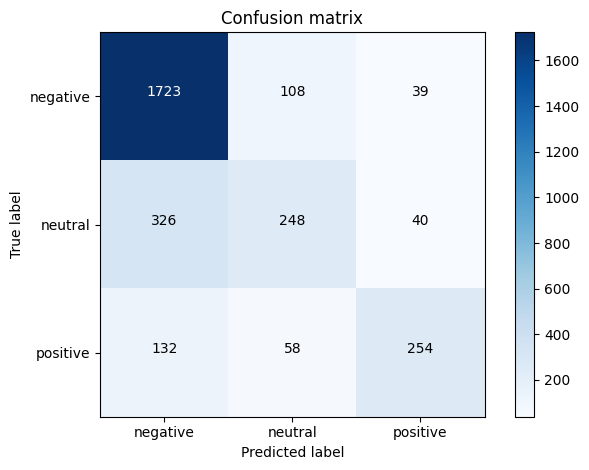

In [31]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment = "center",
               color = "white" if cm[i, j] > thresh else "black")

      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(Y_test, predictions, labels=['negative','neutral','positive'])
plot_confusion_matrix(cm, classes = ['negative', 'neutral', 'positive'])